In [1]:
from gerrychain import (GeographicPartition, Partition, Graph, proposals, updaters, constraints, accept, Election, grid)
from gerrychain.metrics import mean_median, partisan_bias, polsby_popper, efficiency_gap, partisan_gini
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import pickle
import json
import time
from functools import partial
import networkx as nx


from chain import MarkovChain as mc2
from plotting import *
from run_chains4 import *

# Utilities for Analyzing Partisan Symmetry Measures

In [2]:
c = Chain('flip-mh', 10000)

In [6]:
def generate_seats_votes(v, save=False, savetitle=None):
    """
    Given vote shares v, generate the seats-votes curve.
    
    Parameters:
        v (ndarray): R vote shares in districts
    """
    # The average vote share
    vbar = np.mean(v)
    
    # Use the assumption of uniform partisan swing
    s = np.vectorize(lambda k: np.count_nonzero(v-vbar+k > 1/2))
    
    domain = np.linspace(0, 1, 400)
    
    plt.plot(domain, s(domain), label="Seats-Votes Curve")
    plt.scatter(vbar, s(vbar), label="Actual")
    plt.scatter(1/2, 1/2*len(v), label="Center Point")
    plt.plot((0, 1), (0, len(v)), label="Perfect Proportionality")
    plt.title("Seats-Votes Curve")
    plt.xlabel(r'$k$, Uniform Partisan Swing')
    plt.ylabel(r'$S$, R Seats Won')
    plt.legend(loc="upper left")
    
    if save: plt.savefig(savetitle+'.png')
    plt.show()

In [4]:
def partisan_bias(v):
    """
    Given vote shares v, computes the partisan bias score (where positive indicates a R advantage).
    
    Parameters:
        v (ndarray): R vote shares in districts
    """
    vbar = np.mean(v)
    s = lambda k: np.count_nonzero(v-vbar+k > 1/2)/len(v)
    return s(1/2) - 1/2

def mean_median(v):
    """
    Given vote shares v, computes the mean-median score (where positive indicates a R advantage).
    
    Parameters:
        v (ndarray): R vote shares in districts
    """
    return np.median(v) - np.mean(v)

In [3]:
v_sen0 = c.data.iloc[0, 29:33].copy()
v_gov0 = c.data.iloc[0, 33:37].copy()
v_comb0 = c.data.iloc[0, 37:41].copy()

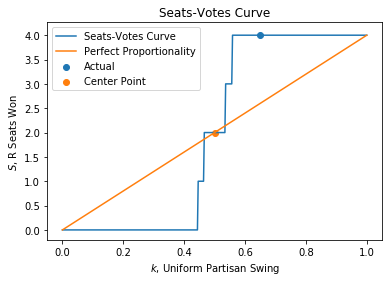

In [7]:
generate_seats_votes(v_sen0)

The way my code is written, signed scores in gerrychain indicate a Dem advantage when they are positive, and a Rep advantage when they are not.

In [10]:
c.data.columns

Index(['County Splits', 'Mattingly Splits Score', 'Cut Edges',
       'Avg Abs Partisan Dislocation - SEN',
       'Avg Abs Partisan Dislocation - G',
       'Avg Abs Partisan Dislocation - COMB', 'Mean Median - SEN',
       'Mean Median - G', 'Mean Median - COMB', 'Efficiency Gap - SEN',
       'Efficiency Gap - G', 'Efficiency Gap - COMB', 'Partisan Bias - SEN',
       'Partisan Bias - G', 'Partisan Bias - COMB', 'Partisan Gini - SEN',
       'Partisan Gini - G', 'Partisan Gini - COMB', 'Seats Won - SEN',
       'Seats Won - G', 'Seats Won - COMB', 'PP1', 'PP2', 'PP3', 'PP4', 'POP1',
       'POP2', 'POP3', 'POP4', 'Sorted SenRep Vote Share 1',
       'Sorted SenRep Vote Share 2', 'Sorted SenRep Vote Share 3',
       'Sorted SenRep Vote Share 4', 'Sorted GRep Vote Share 1',
       'Sorted GRep Vote Share 2', 'Sorted GRep Vote Share 3',
       'Sorted GRep Vote Share 4', 'Sorted CombRep Vote Share 1',
       'Sorted CombRep Vote Share 2', 'Sorted CombRep Vote Share 3',
       'Sorted C

In [56]:
least_rep = {'Least Rep - SEN': np.min(c.data.iloc[:, 29:33], axis=1), 
             'Least Rep - G': np.min(c.data.iloc[:, 33:37], axis=1),
             'Least Rep - COMB': np.min(c.data.iloc[:, 37:41], axis=1)}

In [11]:
plt.scatter?

Text(0, 0.5, 'Sorted CombRep Vote Share 1')

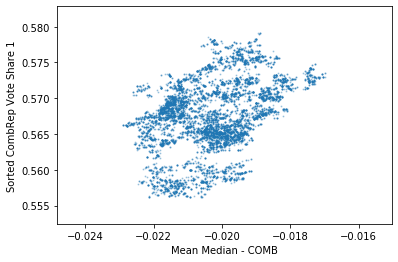

In [13]:
key1, key2 = 'Mean Median - COMB', 'Sorted CombRep Vote Share 1'
plt.scatter(c.data[key1], c.data[key2], s=1, alpha=0.3)
plt.xlabel(key1)
plt.ylabel(key2)

# Running chains from selected started points

In [17]:
import time

In [6]:
g = list()
a = list()
for i in range(100000, 1100000, 100000):
    graph = Graph.from_json('AlternativePlans/graph_recom_'+str(i)+'.json')
    g.append(graph)
    assignment = dict()
    for j in graph.nodes:
        assignment[j] = graph.nodes[j]['US_Distric']
    a.append(assignment)

In [18]:
c = dict()
for assignment in a:
    i = int(np.round(time.time(), 0))
    c[i] = Chain('flip-mh', 1000, starting_assignment=assignment, storage_ratio=100)

In [19]:
c.keys()

dict_keys([1595015894, 1595015899, 1595015906, 1595015914, 1595015921, 1595015931, 1595015940, 1595015948, 1595015957, 1595015964])